## Business Problem Understanding

**Context**

Sebuah perusahaan E-commerce, mengalami churn atau bisa disebut sebagai customer yang tidak menggunakan ecommerce ini lagi. Churn dapat dianggap sebagai kerugian perusahaan, karena jika dibiarkan customer pada E-commerce ini semakin lama semakin sedikit. Maka dari itu, perusahaan ingin mengetahui customer mana yang akan setia dan customer mana yang akan menginggalkan E-commerce ini. Hal ini dapat digunakan oleh perusahaan dalam mengambil langkah marketing yang sesuai dengan karakteristik customer.

Target :
<br>
0 : Customer yang masih setia berbelanja di E-commerce 
<br>
1 : Customer yang berhenti menggunakan E-commerce lagi

**Problem Statement**

Customer yang berpotensi churn akan mengurangi pendapatan perusahaan. Sehingga perlu adanya tindakan dari perusahaan untuk meningkatkan pendapatan. Jika perusahaan menargetkan langkah marketing seperti promosi pada seluruh customer tanpa melakukan penyaringan terlebih dahulu, akan memakan pengeluaran yang besar. Perusahaan harus lebih efisien dalam menentukan pengeluarannya, dengan mengetahui customer mana saja yang berpotensi churn. 

**Goals**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan customer akan churn/ tidak. Sehingga promosi dapat lebih digencarkan pada customer yang akan churn.

Perusahaan juga ingin mengetahui faktor apa saja yang membuat customer tersebut churn/ tidak. Sehingga perusahaan dapat membuat rencana yang lebih baik dalam melakukan promosi atau langkah strategic lainnya.

**Analytics Approach**

Kami akan menganalisis data untuk menemukan pola yang mebedakan customer yang berpotensi churn/ tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat mendeteksi apakah customer tersebut akan churn/ tidak.

**Metric Evaluation**

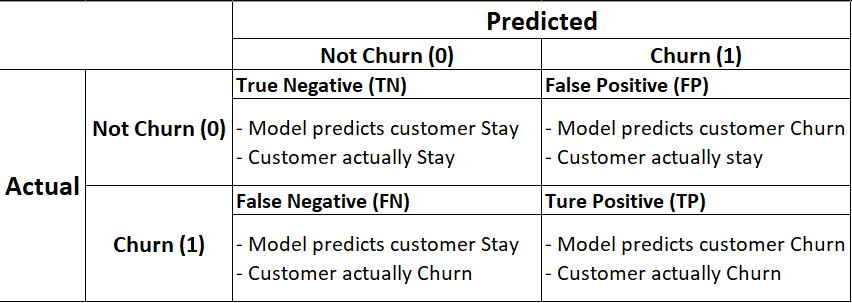

Type 1 error : False Positive
<br>
Kosekuensi : sia-sia biaya promosi yang dilakukan Perusahaan

Type 2 error : False Negative
<br>
Konsekuensi : Perusahaan kehilangan customer 

Berdasarkan konsekuensinya, maka kita akan membuat model yang dapat mengurangi (FP/ TP ?)

## Data Understanding

Dataset source : <https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data>

Note :
- Imbalanced Dataset
- Each row of data represents information about a customer who shops on the E-commerce platform

**Atribute Information**


| **Data** | **Variable** | **Description** |
|:---:|:---:|:---:|
| E Comm | CustomerID | Unique customer ID |
| E Comm | Churn | Churn Flag |
| E Comm | Tenure | Tenure of customer in organization |
| E Comm | PreferredLoginDevice | Preferred login device of customer |
| E Comm | CityTier | City tier |
| E Comm | WarehouseToHome | Distance in between warehouse to home of customer |
| E Comm | PreferredPaymentMode | Preferred payment method of customer |
| E Comm | Gender | Gender of customer |
| E Comm | HourSpendOnApp | Number of hours spend on mobile application or website |
| E Comm | NumberOfDeviceRegistered | Total number of deceives is registered on particular customer |
| E Comm | PreferedOrderCat | Preferred order category of customer in last month |
| E Comm | SatisfactionScore | Satisfactory score of customer on service |
| E Comm | MaritalStatus | Marital status of customer |
| E Comm | NumberOfAddress | Total number of Address added on particular customer |
| E Comm | Complain | Any complaint has been raised in last month |
| E Comm | OrderAmountHikeFromlastYear | Percentage increases in order from last year |
| E Comm | CouponUsed | Total number of coupon has been used in last month |
| E Comm | OrderCount | Total number of orders has been places in last month |
| E Comm | DaySinceLastOrder | Day Since last order by customer |
| E Comm | CashbackAmount | Average cashback in last month |

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('E_Commerce_Dataset.csv')
display(df.head(), df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


The table above shows the top 5 and bottom 5 data entries from our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Numerical Data Checking

In [5]:
# Indentify each numerical data range
df.describe().loc[['min','max']]

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
min,50001.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,11.0,0.0,1.0,0.0,0.0
max,55630.0,1.0,61.0,3.0,127.0,5.0,6.0,5.0,22.0,1.0,26.0,16.0,16.0,46.0,325.0


All numerical data range is appropriate, this checking is necessary to prevent any inappropriate values such as negative in numbers of days or negative numbers of object counts.

# Categorical Data Checking

In [6]:
# Print each unique categorical data to check any typo or any same type category with different names.

unique_dict = {}

for col in df.columns:                                                  # Search for unique categorical data by looping and save it in a dictionary
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        unique_dict[col] = df[col].unique()

for col, unique in unique_dict.items():                                 # Print each unique categorical data by looping
    print(f"'{col}' unique:\n{unique}\n")

'PreferredLoginDevice' unique:
['Mobile Phone' 'Phone' 'Computer']

'PreferredPaymentMode' unique:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

'Gender' unique:
['Female' 'Male']

'PreferedOrderCat' unique:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

'MaritalStatus' unique:
['Single' 'Divorced' 'Married']



There is not any typo but there is some category of same type but with different names. We need to replace it's name and make it to one category type.

In [7]:
# Replace any category of same type into one category type

# PreferredLoginDevice Category
df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'], inplace=True)

# PreferredPaymentMode Category
df['PreferredPaymentMode'].replace(['CC'],['Credit Card'],inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'],['COD'],inplace=True)

# PreferedOrderCat Category
df['PreferedOrderCat'].replace(['Mobile'],['Mobile Phone'],inplace=True)


# Duplicated Data

In [8]:
df.duplicated().sum()

0

There is not any duplicated data

# Outliers

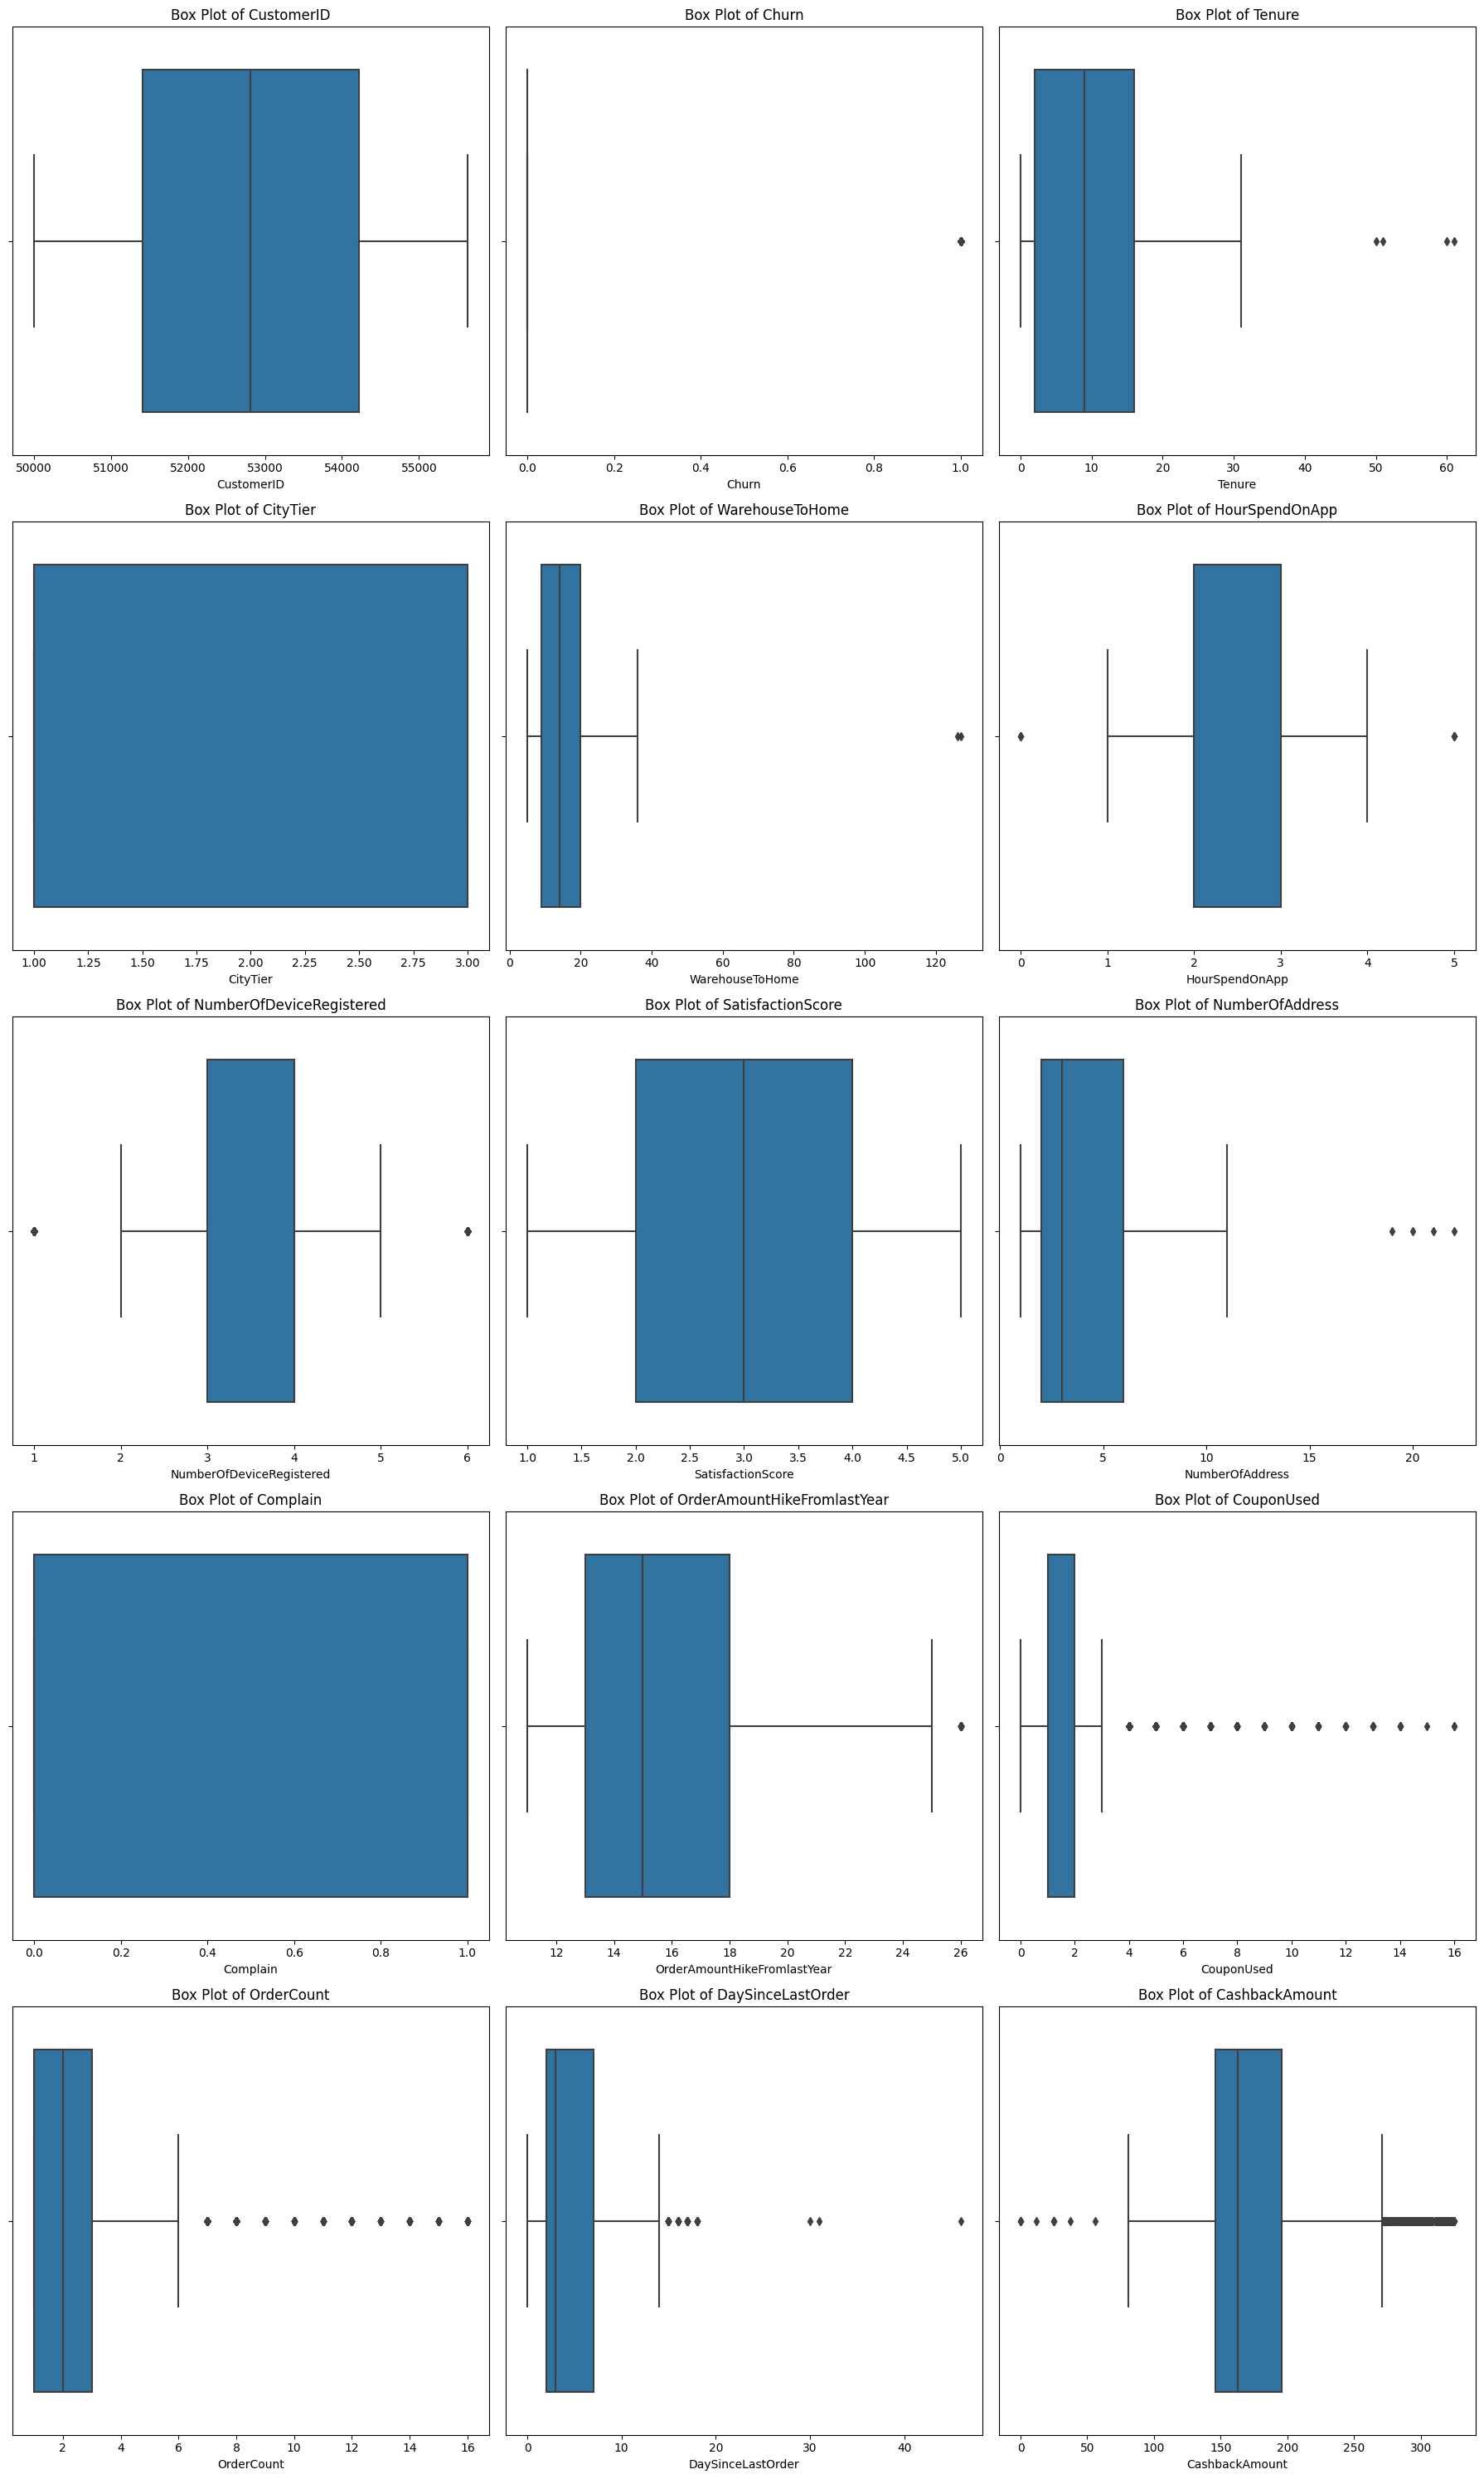

In [9]:
def numerical_boxplots(data):                                                           # Define function to create boxplot for each numerical data
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):                                      # Create boxplot for each numerical data by looping
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)

From each boxplot above, there isn't any necesarry to remove outliers. This beacuse all the values contain valuable information that doesn't affect classification negatively.

# Missing Values

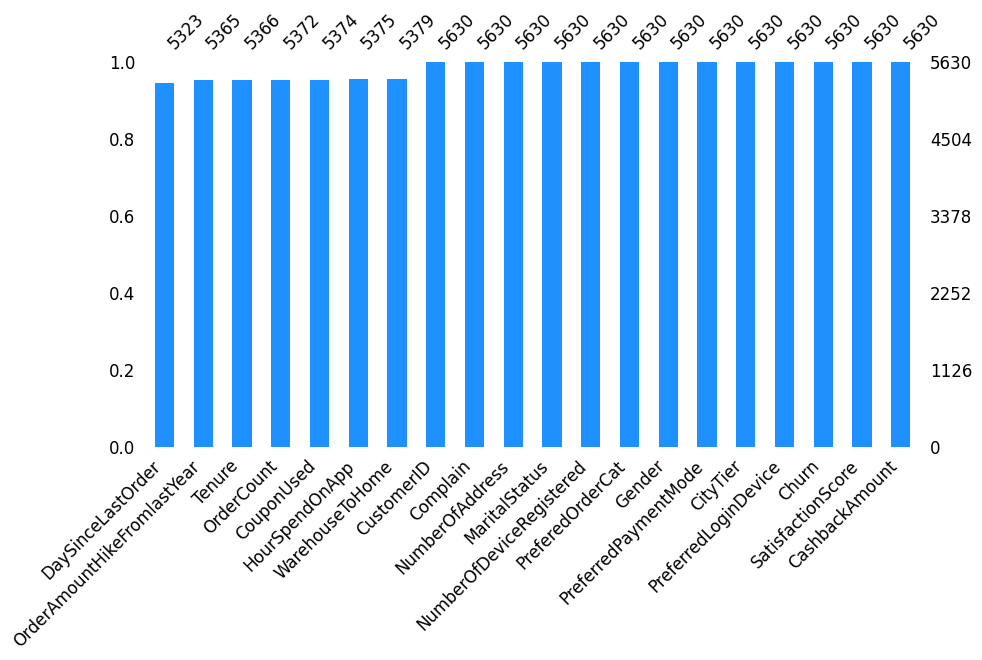

In [10]:
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

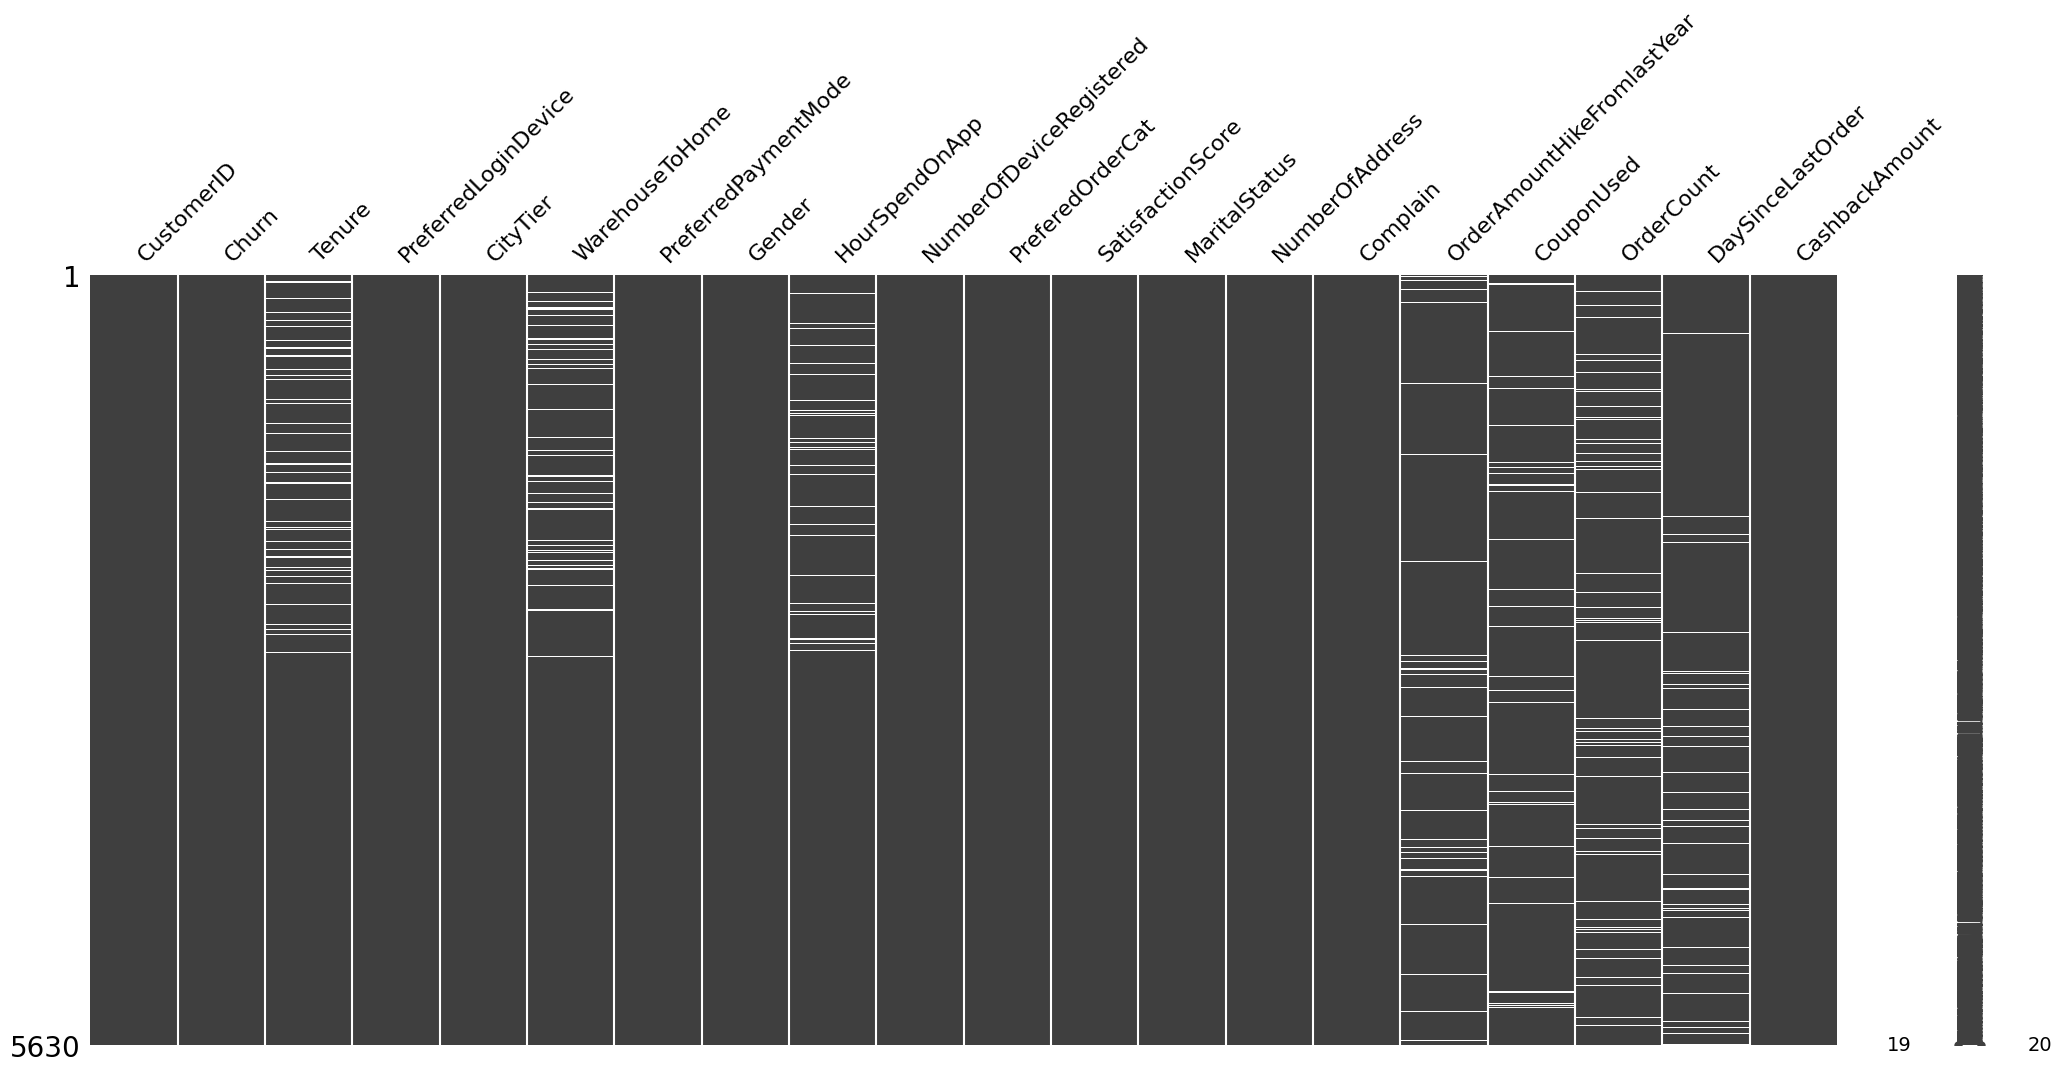

In [11]:
msno.matrix(df)

In [25]:
# DaySinceLastOrder has the most missing value even though the amount is quite small compared to all customers data.
# The missing values matrix also shows clearly how insignificant the amount of missing values is compared to all customers data.
# Since the amount of missing values is quite insignificant hence removing any customer with any missing values would be appropriate without negatively impact analysis result.

df.dropna(inplace=True)
